In [5]:
import pandas as pd
import numpy as np

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

df = pd.read_csv("../datafile_final.csv")
#df = df[["id","ups","downs","pickup_no"]]

pickups = [3600 * x for x in [0, 1/12, 1/6, 1/3, 1/2, 3/4, 1, 2, 5, 10, 15, 24, 30, 36, 42, 48, 60, 72]]

def score(row):
    return row["ups"]-row["downs"]
df['score'] = df.apply(score, axis=1)
def pickup_time(row):
    return pickups[row['pickup_no']]
df['pickup_time'] = df.apply(pickup_time, axis=1)
def title_length(row):
    return len(row['title'])
df['post_length']=df.apply(title_length, axis=1)

In [ ]:
df1=df[["id","post_length"]]
df2=df[["id","score"]]
df3=df1.merge(df2,on='id')

result = sm.ols(formula="score ~ post_length", data=df3).fit()
params=result.params
ax=df3.plot(x='post_length', y='score',kind='scatter')
linerange = np.arange(1, df3['post_length'].max())
ax.plot(linerange, params.Intercept + params.post_length * linerange)

In [15]:
len(df[df['post_length']>175].drop_duplicates(['id']))

472

In [ ]:
pickup1 = 10
pickup2 = 13

df1 = df.loc[df['pickup_no'] == pickup1][['id','score']]
df2 = df.loc[df['pickup_no'] == pickup2][['id','score']]
df3 = df1.merge(df2,on='id')

result = sm.ols(formula="score_y ~ score_x", data=df3).fit()
params=result.params
ax=df3.plot(x='score_x', y='score_y',kind='scatter')
linerange = np.arange(1, df3['score_x'].max())
ax.plot(linerange, params.Intercept + params.score_x * linerange)

df4 = df[['id','pickup_time']]
df5 = df[['id','score']]
df6 = df4.merge(df5,on='id')

result = sm.ols(formula="score ~ pickup_time", data=df6).fit()
params=result.params
ax=df6.plot(x='pickup_time', y='score',kind='scatter')
linerange = np.arange(1, df6['pickup_time'].max())
ax.plot(linerange, params.Intercept + params.pickup_time * linerange)

In [20]:
pickup1 = 10
pickup2 = 15

df1 = df.loc[df['pickup_no'] == pickup1][['id','score']]
df2 = df.loc[df['pickup_no'] == pickup2][['id','score']]
df3 = df1.merge(df2,on='id')

result = sm.ols(formula="score_y ~ score_x", data=df3).fit()
params=result.params
#ax=df3.plot(x='score_x', y='score_y',kind='scatter')
#linerange = np.arange(1, df3['score_x'].max())
#ax.plot(linerange, params.Intercept + params.score_x * linerange)
params

Intercept    0.492291
score_x      1.124047
dtype: float64

In [24]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

In [25]:
import config

In [27]:
import praw

In [29]:
r=      praw.Reddit(client_id=config.CLIENT_ID,
                    client_secret=config.CLIENT_SECRET,
                    password=config.PASSWORD,
                    username=config.USERNAME,
                    user_agent=config.USER_AGENT)

In [33]:
r.submission('aujfms').created_utc

1551087384.0

In [36]:
from datetime import datetime
def time(row):
    return datetime.utcfromtimestamp(row['created_utc']).hour
df['created_time']=df.apply(time, axis=1)

In [38]:
df65=df.sort_values('pickup_no', ascending=False).drop_duplicates(subset=['id']).sort_index().reset_index(drop=True)

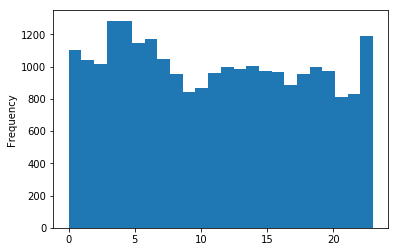

In [41]:
df65['created_time'].plot.hist(bins=24)

In [53]:
df65[df65['created_time']==23]

87       23
88       23
158      23
159      23
160      23
161      23
162      23
163      23
164      23
165      23
166      23
167      23
168      23
169      23
170      23
171      23
172      23
173      23
174      23
175      23
176      23
177      23
178      23
179      23
180      23
181      23
182      23
183      23
184      23
185      23
         ..
24202    23
24203    23
24204    23
24205    23
24206    23
24207    23
24208    23
24209    23
24210    23
24211    23
24212    23
24213    23
24214    23
24215    23
24216    23
24217    23
24218    23
24219    23
24220    23
24221    23
24222    23
24223    23
24224    23
24225    23
24226    23
24227    23
24228    23
24229    23
24230    23
24231    23
Name: created_time, Length: 1188, dtype: int64

In [68]:
post_dir={x: [] for x in range(0,24)}

In [69]:
def sort_score(row):
    if row['score'] > 1000:
        post_dir[row['created_time']].append(row['score'])

In [70]:
df65.apply(sort_score, axis=1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
24247    None
24248    None
24249    None
24250    None
24251    None
24252    None
24253    None
24254    None
24255    None
24256    None
24257    None
24258    None
24259    None
24260    None
24261    None
24262    None
24263    None
24264    None
24265    None
24266    None
24267    None
24268    None
24269    None
24270    None
24271    None
24272    None
24273    None
24274    None
24275    None
24276    None
Length: 24277, dtype: object

In [78]:
post_dir['avgs'] = [round(np.mean(post_dir[x]),2) for x in range(0,24)]

In [75]:
post_dir.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [79]:
post_dir['avgs']

[5.56,
 27.38,
 5.0,
 4.22,
 46.07,
 5.49,
 17.32,
 4.02,
 3.09,
 66.71,
 8.33,
 65.45,
 26.98,
 54.27,
 21.57,
 11.74,
 9.96,
 3.5,
 10.9,
 51.48,
 5.47,
 3.87,
 3.57,
 49.03]

<BarContainer object of 24 artists>

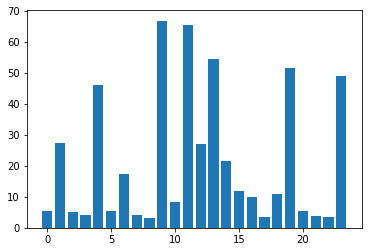

In [82]:
plt.bar([x for x in range(0,24)], post_dir['avgs'])

In [83]:
container2=[]
def aaus_first10(row):
    container2.append((df[(df['id'] == row['id']) & (df['pickup_no'] < 7)].mean(),row['score']))

In [84]:
df65.apply(aaus_first10, axis=1)

KeyboardInterrupt: 

In [85]:
dfx=df[df['pickup_no'] < 7]

In [89]:
dfx.sort_values(id)

KeyError: <built-in function id>

In [90]:
df[id]= None

In [109]:
df.iloc[1]['id'][2]. # 22

AttributeError: 'str' object has no attribute 'to'

In [8]:
pickup1 = 10
pickup2 = 13

df1 = df.loc[df['pickup_no'] == pickup1][['id','score']]
df2 = df.loc[df['pickup_no'] == pickup2][['id','score']]
df3 = df1.merge(df2,on='id')

result = sm.ols(formula="score_y ~ score_x", data=df3).fit()
params=result.params
ax=df3.plot(x='score_x', y='score_y',kind='scatter')
linerange = np.arange(1, df3['score_x'].max())
ax.plot(linerange, params.Intercept + params.score_x * linerange)

df4 = df[['id','pickup_time']]
df5 = df[['id','score']]
df6 = df4.merge(df5,on='id')

result = sm.ols(formula="score ~ pickup_time", data=df6).fit()
params=result.params
ax=df6.plot(x='pickup_time', y='score',kind='scatter')
linerange = np.arange(1, df6['pickup_time'].max())
ax.plot(linerange, params.Intercept + params.pickup_time * linerange)

,id,num_comments,title,author,created_utc,ups,downs,edited,stickied,locked,active_user_count,subscribers,time_now,pickup_no,post_pickup,score,pickup_time,post_length
0,audvaw,0,What is the worst thing you ever bought?,mozammel1,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,40
1,audvam,0,Which is a favourite song of yours growing up?,hitaccount,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,46
2,audv9a,0,What subreddit would be good for promoting fre...,HorseReader,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,59
3,audv66,2,What is better Pepsi or Coca-cola?,XxBarnyardManxX,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,34
4,audv65,0,"Reddit, what's your side-hustle?",copypasteme,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,32
5,audvkk,0,"People of reddit, whats the worst smelling foo...",UchihaSasukeclan,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,84
6,audvjf,0,What is the wierdest way of phrasing something...,decoder12345,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,149
7,audvja,0,"IOS or Android, what do you prefer?",TheGreyGuyHari,1.551050e+09,2,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,2,0.0,35
8,audvmf,0,"If a secret, members only sub existed on Reddi...",halfadozenhogs,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,163
9,audvm0,0,What’s something you can never tell your parents?,NaturalJustification,1.551050e+09,1,0,False,False,False,207256,21665422,1.551050e+09,0,1.551050e+09,1,0.0,49


,id,pickup_time
0,audvaw,0.0
1,audvam,0.0
2,audv9a,0.0
3,audv66,0.0
4,audv65,0.0
5,audvkk,0.0
6,audvjf,0.0
7,audvja,0.0
8,audvmf,0.0
9,audvm0,0.0


In [23]:
df.drop(df[df['score']<50])

KeyError: "['id' 'num_comments' 'title' 'author' 'created_utc' 'ups' 'downs' 'edited'\n 'stickied' 'locked' 'active_user_count' 'subscribers' 'time_now'\n 'pickup_no' 'post_pickup' 'score' 'pickup_time' 'post_length'] not found in axis"